In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\SONAI\Desktop\Project\Big_Mart\Big-Mart.csv')
# First Five Observations
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Understanding

In [3]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [4]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='object']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 7 categorical variables
------------------------------------------------------------------------------------------
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [5]:
# Finding numerical variables
numerical_variables = [var for var in df.columns if df[var].dtype!='object']
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 5 numerical variables
------------------------------------------------------------------------------------------
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [6]:
# Checking shape of the dataset
df.shape

(14204, 12)

There are 14204 rows(intances) and 12 columns(11 featured and 1 Target)

In [7]:
# Basic description of Dataset
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [8]:
# number of unique values in each columns
df.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
dtype: int64

There, 1559 unique products of 16 different types are available across 10 unique outlets(Stores) of 4 different types at 3 different location. And Item_Fat_Content are 5 types.

In [9]:
# The unique values in each column
for var in df.columns:
    print(var,'\n\n',df[var].unique(),'\n')
    print('--'*45)


Item_Identifier 

 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 

------------------------------------------------------------------------------------------
Item_Weight 

 [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.

In [10]:
#Count of unique values in each column  
for var in df.columns:
    print(df[var].value_counts(dropna=False))
    print('--'*45)

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
------------------------------------------------------------------------------------------
NaN       2439
17.600     135
12.150     127
10.500     123
13.650     115
          ... 
7.640        7
5.905        7
7.850        6
4.615        6
9.035        6
Name: Item_Weight, Length: 416, dtype: int64
------------------------------------------------------------------------------------------
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
------------------------------------------------------------------------------------------
0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13006, dtyp

In [11]:
# Checking for number of null values in dataset
df.isna().sum().sort_values(ascending=False)

Item_Outlet_Sales            5681
Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

There are 5681 null values in Item_Outlet_Sales, 4016 null values in Outlet_Size and 2439 null values in Item_Weight. Note that item visibility has 0 value which has no significance.

In [12]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values



# Data Cleaning , Feature Engineering and EDA

In [13]:
#Drop all rows that contains null values for Target Variable 'Item_Outlet_Sales'
df.dropna(subset=['Item_Outlet_Sales'], inplace=True)

In [14]:
# Replacing null values with the most frequent value in categorical variable 'Outlet_Size'
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

#Replacing null values with the nearest neighbour value in categorical variable 'Outlet_Size'
#from sklearn.impute import KNNImputer

#Encoding Categorical Outlet Size
#df['Outlet_Size'] = df['Outlet_Size'].map({'Medium':0,'High':1,'Small':2})

# Create a KNNImputer object
#knnImputer = KNNImputer(n_neighbors=1)  # Adjust n_neighbors as 1

# Impute missing values in 'Outlet_Size'
#df['Outlet_Size'] = knnImputer.fit_transform(df[['Outlet_Size']])

In [15]:
df['Outlet_Size'].value_counts(dropna=False)

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
#Replacing null with mean for numerical variables 'Item_Weight'
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [17]:
## Drop rows where 'Item_Visibility' is 0
df = df[df['Item_Visibility'] != 0]

In [18]:
# Basic description of Dataset after cleaning
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,7997,7997.000000,7997,7997.000000,7997,7997.000000,7997,7997.000000,7997,7997,7997,7997.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT049,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,4789,NaN,1145,NaN,877,NaN,4881,3137,5235,NaN
mean,NaN,12.873231,NaN,0.070482,NaN,141.181925,NaN,1997.826185,NaN,NaN,NaN,2178.575445
std,NaN,4.226817,NaN,0.050308,NaN,62.201545,NaN,8.364645,NaN,NaN,NaN,1704.227930
min,NaN,4.555000,NaN,0.003575,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,9.310000,NaN,0.031403,NaN,94.109400,NaN,1987.000000,NaN,NaN,NaN,829.586800
50%,NaN,12.857645,NaN,0.057792,NaN,143.215400,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.100000,NaN,0.098109,NaN,185.758200,NaN,2004.000000,NaN,NaN,NaN,3098.633200


In [19]:
# Basic information of dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7997 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7997 non-null   object 
 1   Item_Weight                7997 non-null   float64
 2   Item_Fat_Content           7997 non-null   object 
 3   Item_Visibility            7997 non-null   float64
 4   Item_Type                  7997 non-null   object 
 5   Item_MRP                   7997 non-null   float64
 6   Outlet_Identifier          7997 non-null   object 
 7   Outlet_Establishment_Year  7997 non-null   int64  
 8   Outlet_Size                7997 non-null   object 
 9   Outlet_Location_Type       7997 non-null   object 
 10  Outlet_Type                7997 non-null   object 
 11  Item_Outlet_Sales          7997 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 812.2+ KB


In [20]:
# Verify if all null and irrelavent values are removed
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

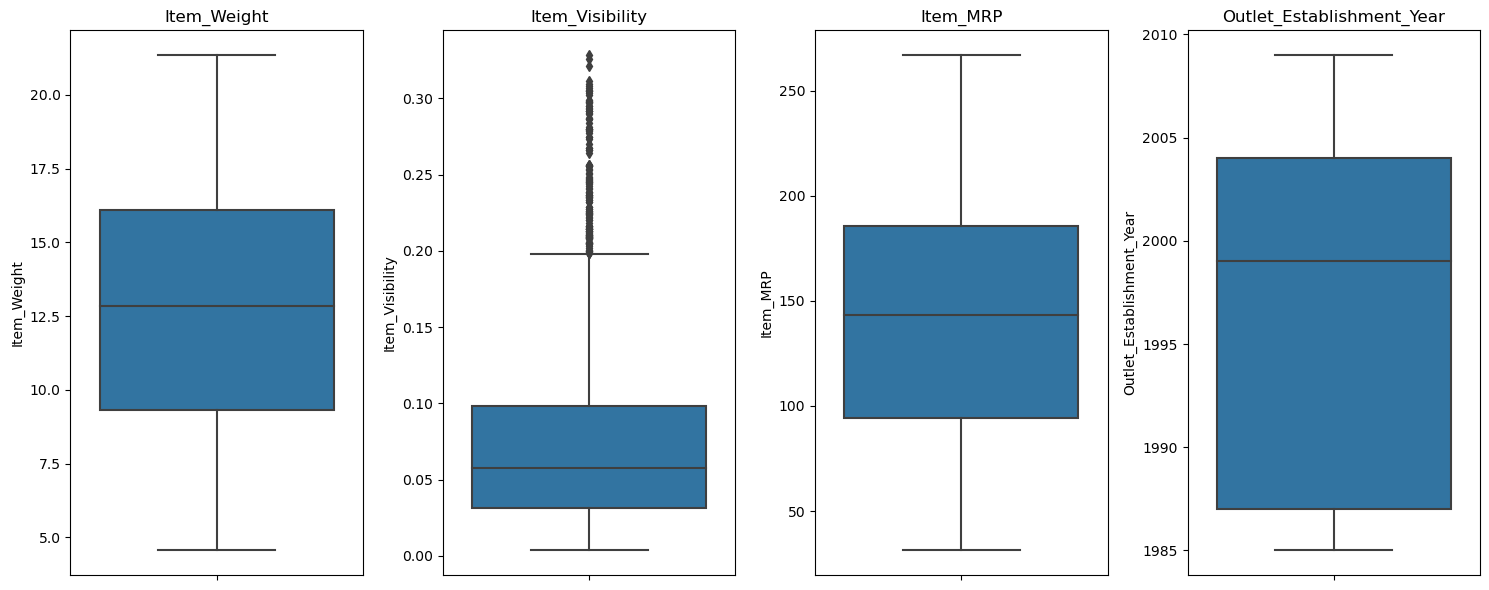

In [21]:
# Box plot to visualizing outliers
fig, axes = plt.subplots(1,(len(numerical_variables)-1), figsize=(15, 6))
axes = axes.flatten()

for i, var in enumerate(numerical_variables):
    if i<(len(numerical_variables)-1):
        sns.boxplot(y=df[var], ax=axes[i])
        axes[i].set_title(var)
    else:
        pass
    

plt.tight_layout()
plt.show()

In [22]:
#Replacing outliers by upper limit and lower limit
for var in numerical_variables:
        Q1= df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        df.loc[(df[var] > upper_limit),var] = upper_limit
        df.loc[(df[var] < lower_limit),var] = lower_limit

In [23]:
#Replacing outliers by upper limit and lower limit except the Target Variable
#for i, var in enumerate(numerical_variables):
#    if i < (len(numerical_variables)-1):
#        Q1= df[var].quantile(0.25)
#        Q3 = df[var].quantile(0.75)
#        IQR = Q3 - Q1
#        upper_limit = Q3 + 1.5 * IQR
#        lower_limit = Q1 - 1.5 * IQR
#        df.loc[(df[var] > upper_limit),var] = upper_limit
#        df.loc[(df[var] < lower_limit),var] = lower_limit

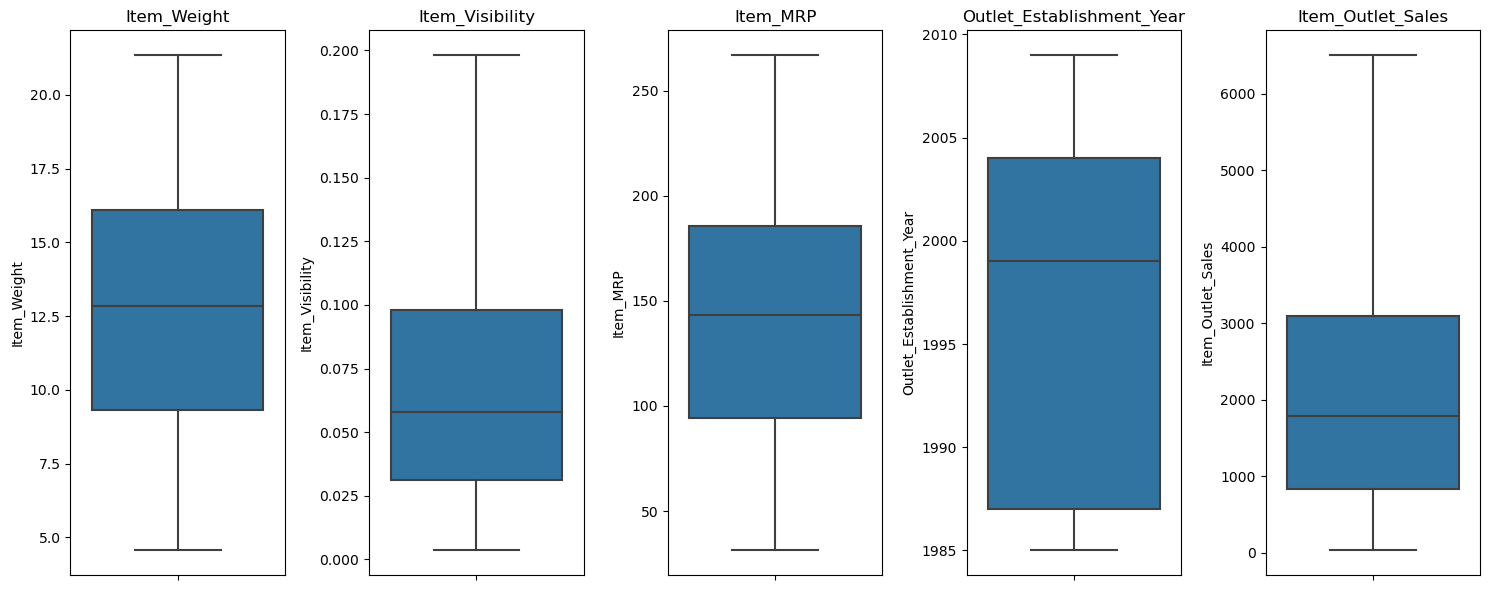

In [24]:
# Box Plot after handling outliers
fig, axes = plt.subplots(1, len(numerical_variables), figsize=(15, 6))
axes = axes.flatten()

for i, var in enumerate(numerical_variables):
    sns.boxplot(y=df[var], ax=axes[i])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

In [25]:
#Count of unique values in Categorical column  
for var in categorical_variables:
    print(df[var].value_counts(dropna=False))
    print('--'*45)

FDG33    10
FDW13    10
NCF42     9
NCQ06     9
FDG09     9
         ..
FDE52     1
FDC23     1
FDK57     1
FDQ60     1
FDP15     1
Name: Item_Identifier, Length: 1559, dtype: int64
------------------------------------------------------------------------------------------
Low Fat    4789
Regular    2708
LF          285
reg         113
low fat     102
Name: Item_Fat_Content, dtype: int64
------------------------------------------------------------------------------------------
Fruits and Vegetables    1145
Snack Foods              1132
Household                 859
Frozen Foods              805
Dairy                     644
Canned                    616
Baking Goods              603
Health and Hygiene        487
Soft Drinks               411
Meat                      405
Breads                    234
Hard Drinks               197
Others                    159
Starchy Foods             133
Breakfast                 107
Seafood                    60
Name: Item_Type, dtype: int64
---------

In [26]:
#There is a similarity between Item_Identifier and Item_Type
#Item_Type has been changed according to that similarity
df['Item_Type'] = df['Item_Identifier'].str[:2]
df['Item_Type'] = df['Item_Type'].replace({'FD': 'Food', 'DR': 'Drinks', 'NC': 'Non-Consumable'})
df.Item_Type.value_counts()

Food              5759
Non-Consumable    1505
Drinks             733
Name: Item_Type, dtype: int64

In [27]:
# Replace reapted values in Item_Fat_Content
df['Item_Fat_Content'] = df.Item_Fat_Content.replace(['LF', 'low fat', 'reg'],['Low Fat','Low Fat', 'Regular'])
df.Item_Fat_Content.value_counts()

Low Fat    5176
Regular    2821
Name: Item_Fat_Content, dtype: int64

Item_identifier ID has first two charachters defining the item type, these are FD, DR, NC means 'Food', 'Drinks', 'Non-Consumables'. Converting Item_Type into these 3 categories Food, Drinks,Non-Consumable. And repeated values in 'Item_Fat_Content' are replaced.

In [28]:
# number of unique values in each categorical_variables
df[categorical_variables].nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                  3
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

After feature engineering, 1559 unique products of 3 different types are available there, across 10 unique outlets(Stores) of 4 different types at 3 different location. And Item_Fat_Content are two types.

In [29]:
#Count of unique values in Numerical column  
for var in numerical_variables:
    print(df[var].value_counts(dropna=False))
    print('--'*45)

12.857645    1373
17.600000      81
12.150000      77
13.650000      72
11.800000      71
             ... 
5.000000        1
6.520000        1
9.420000        1
7.685000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64
------------------------------------------------------------------------------------------
0.198167    140
0.076975      3
0.041355      2
0.103442      2
0.037794      2
           ... 
0.054142      1
0.018920      1
0.044974      1
0.103611      1
0.044878      1
Name: Item_Visibility, Length: 7740, dtype: int64
------------------------------------------------------------------------------------------
196.5768    6
170.5422    6
172.0422    6
142.0154    6
109.5228    6
           ..
254.8040    1
232.3326    1
157.5972    1
108.7912    1
75.4670     1
Name: Item_MRP, Length: 5700, dtype: int64
------------------------------------------------------------------------------------------
1985.0    1373
1999.0     877
2004.0     876
1987.0     873
2

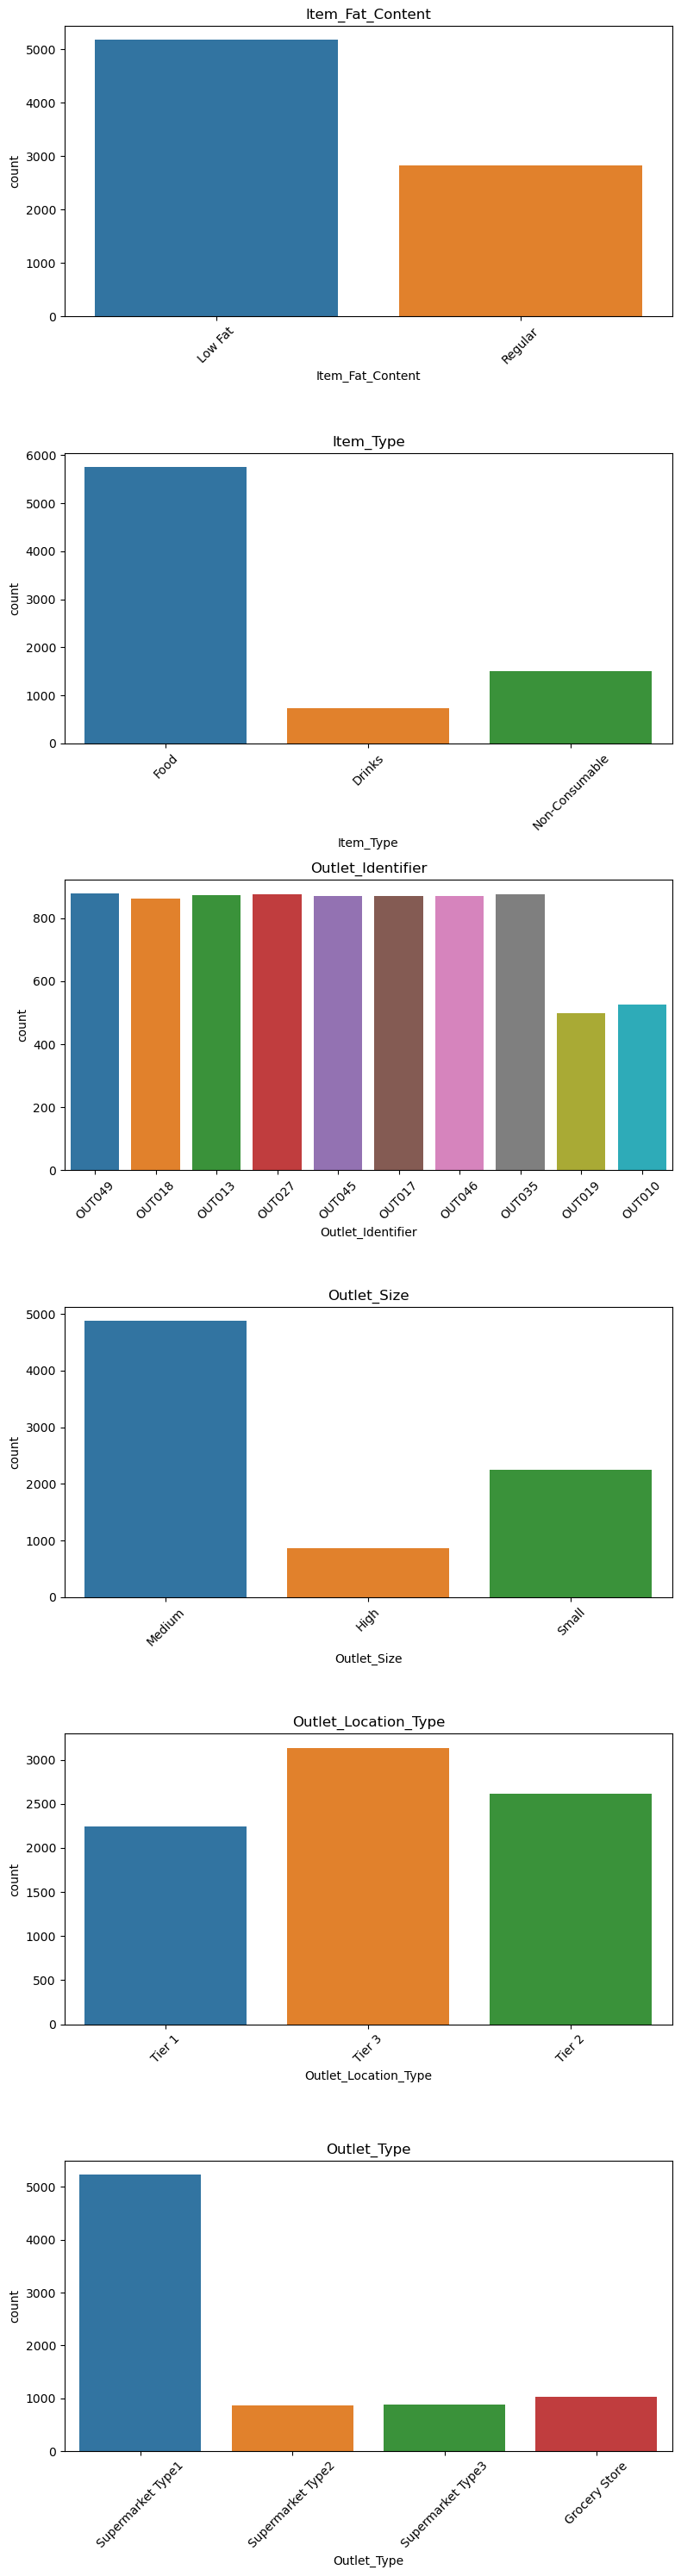

In [30]:
#Countplots of all categorical Features except 'Item_Identifier' as it has 1559 unique values
fig, axes = plt.subplots((len(categorical_variables)-1), 1, figsize=(8, 30))
axes = axes.flatten()

for i, var in enumerate(categorical_variables[1:]):
#    if i!=0:
        sns.countplot(data=df, x=var, ax=axes[i])
        axes[i].set_title(var)
        axes[i].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

Item_Fat_Content: Most Items sold are low Fat.
Item_Type: Food Items are more popular.
Outlet_Identifier: Sold items are ditributed evenly amoung all stores, execpt OUT019 and OUT010.
Outlet_Size: Bigmart Stores are mostly in medium size in this data.
Outlet_Location_Type: Most products are sold in Tier3.
Outlet_Type: Most Store Types are SuperMarket Type1.

__________________________________________________________________________________________


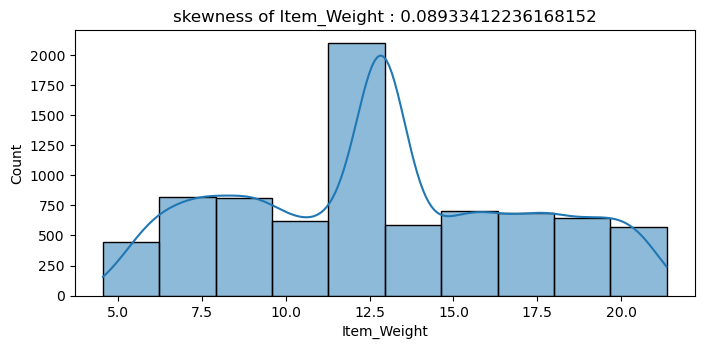

__________________________________________________________________________________________


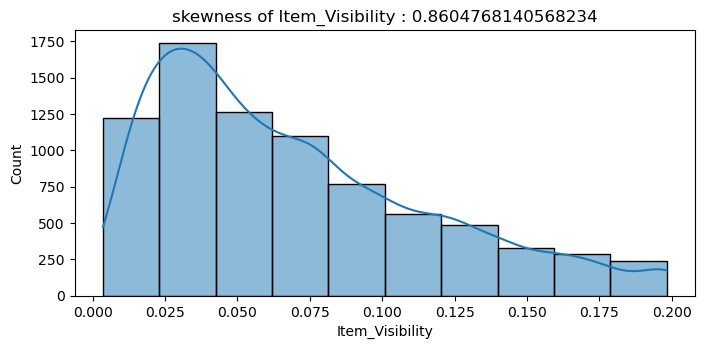

__________________________________________________________________________________________


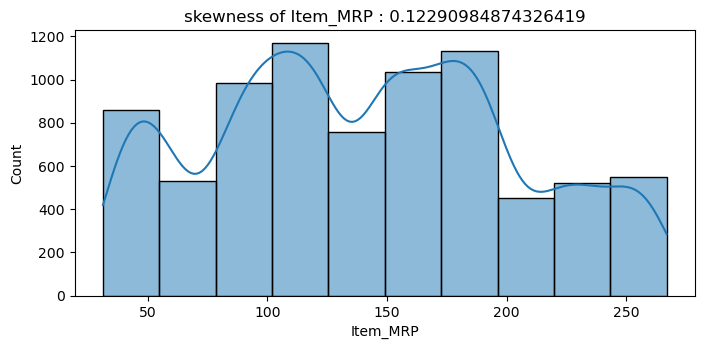

__________________________________________________________________________________________


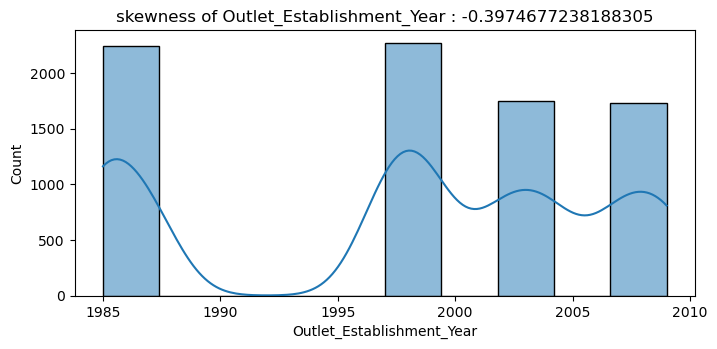

__________________________________________________________________________________________


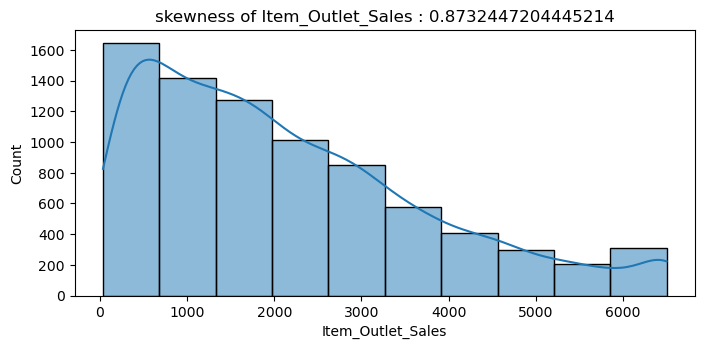

In [31]:
#Distribution and skewness of all numerical features and target feature
for var in numerical_variables:
    plt.figure(figsize=(8,20))
    plt.subplot(len(numerical_variables),1,1)
    ax=sns.histplot(data=df,x=df[var],kde=True,bins=10)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

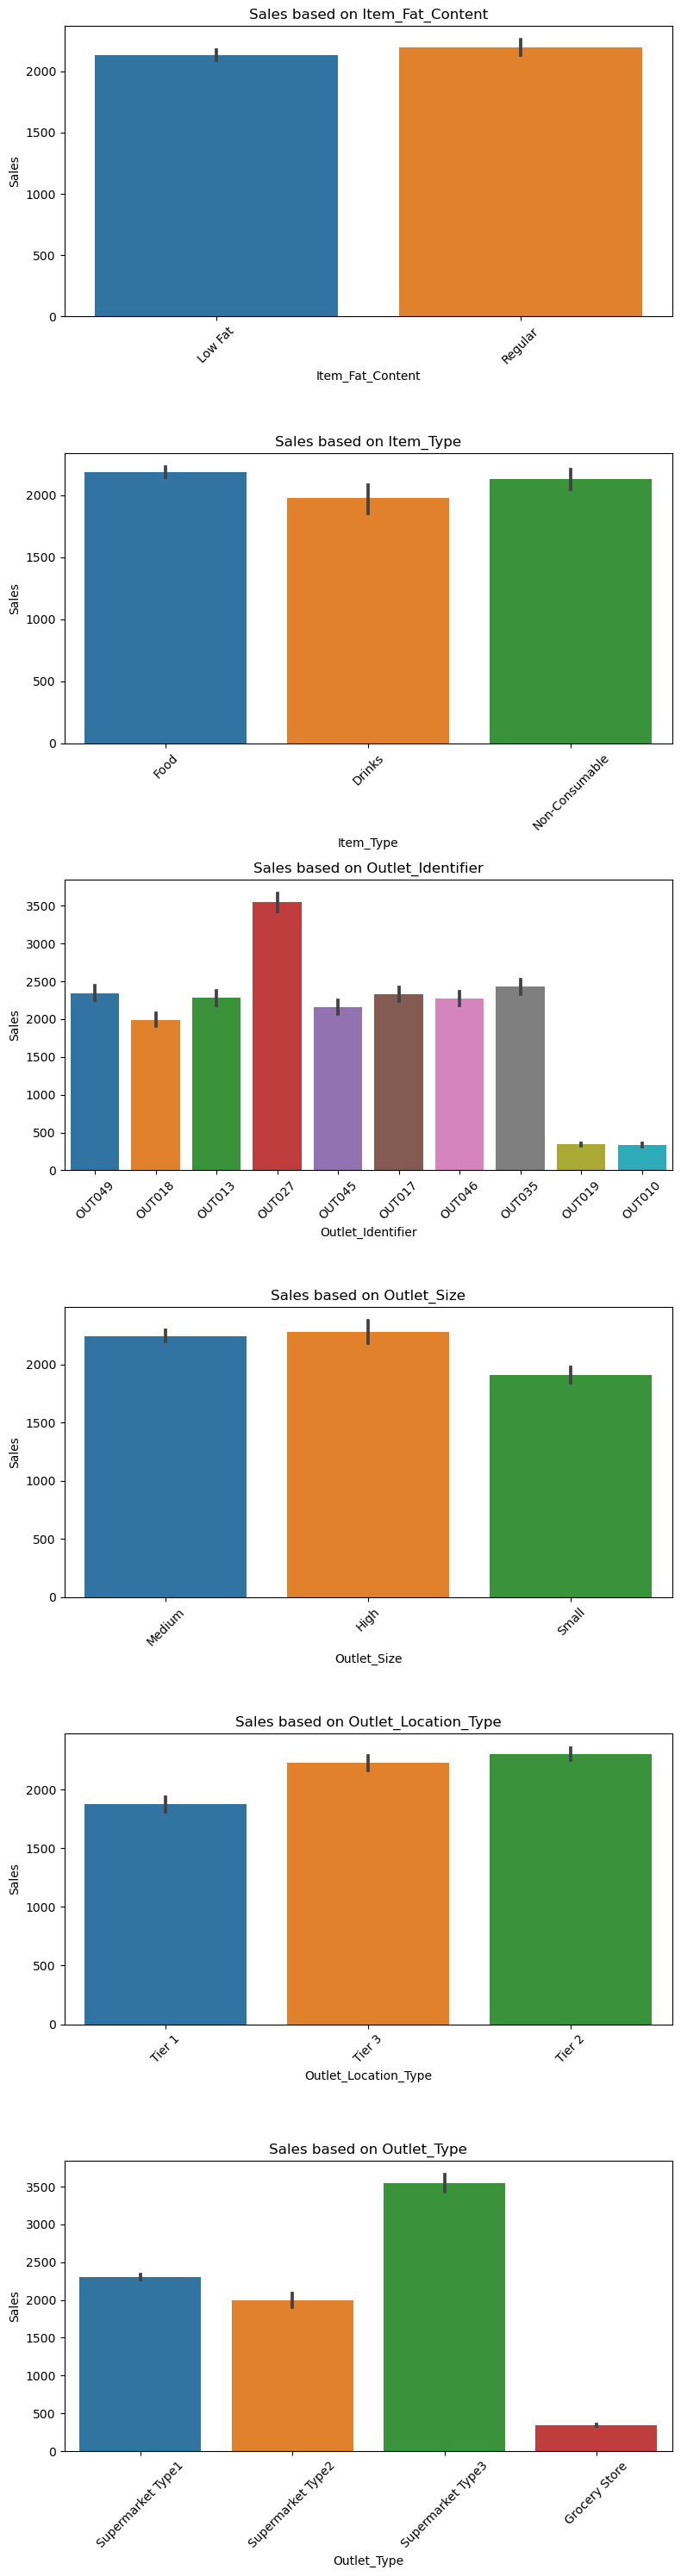

In [32]:
# BarPlot for Sales per categorical features except 'Item_Identifier'

# Create subplots
fig, axes = plt.subplots(len(categorical_variables) - 1, 1, figsize=(8, 30))
axes = axes.flatten()

# Iterate over categorical variables and create bar plots
for i, var in enumerate(categorical_variables[1:]):
    ax = sns.barplot(data=df, x=var, y='Item_Outlet_Sales', ax=axes[i])
    ax.set_title(f'Sales based on {var}')
    
    # Rotate x-axis labels by 90 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    # Set y-axis label
    ax.set_xlabel(var)
    ax.set_ylabel('Sales')

plt.tight_layout()
plt.show()

In [33]:
df.sample(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5033,FDH22,6.405000,Low Fat,0.136513,Food,128.7678,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3052.0272
6527,DRH11,5.980000,Low Fat,0.075711,Drinks,55.6614,OUT045,2002.0,Medium,Tier 2,Supermarket Type1,331.5684
2700,FDB20,7.720000,Low Fat,0.052275,Food,79.1986,OUT017,2007.0,Medium,Tier 2,Supermarket Type1,778.9860
1923,FDK10,5.785000,Regular,0.040325,Food,180.4660,OUT013,1987.0,High,Tier 3,Supermarket Type1,719.0640
7109,FDW43,20.100000,Regular,0.022425,Food,226.3036,OUT046,1997.0,Small,Tier 1,Supermarket Type1,910.8144
3861,FDZ43,11.000000,Regular,0.057011,Food,241.9512,OUT013,1987.0,High,Tier 3,Supermarket Type1,2908.2144
8091,FDW08,12.100000,Low Fat,0.148986,Food,106.5280,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,1171.8080
3279,FDP03,5.150000,Regular,0.061177,Food,121.8388,OUT046,1997.0,Small,Tier 1,Supermarket Type1,3219.8088
4961,FDK03,12.600000,Regular,0.074339,Food,255.5356,OUT017,2007.0,Medium,Tier 2,Supermarket Type1,6502.2028
7941,FDW09,13.650000,Regular,0.043386,Food,80.2302,OUT010,1998.0,Medium,Tier 3,Grocery Store,79.2302


Outlet_Identifier: Outlet027 has most profitable, and Outlet019 and Outlet010 has least Sells.
Outlet_Size: Sells are moreven in Medium and High size Stores.
Outlet_Location_Type: Most sells are through Tier3 and Tier2, Tier2 is slightly higher.
Outlet_Type: Most Sells are through SuperMarket Type3.

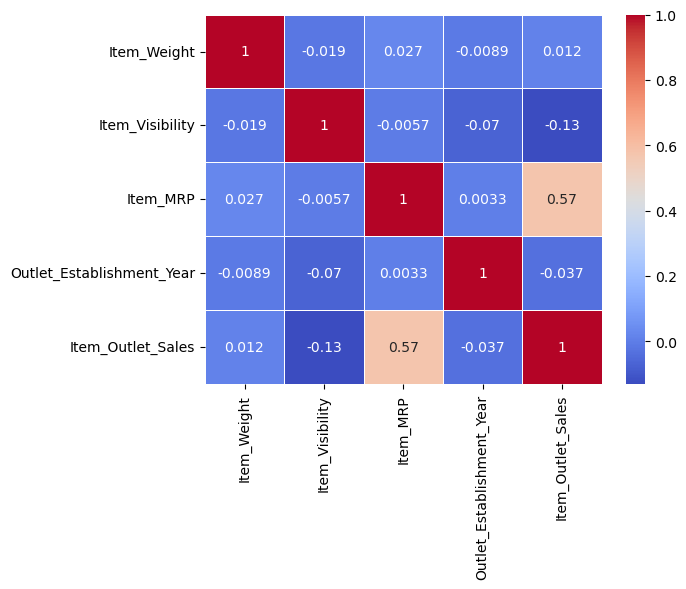

In [34]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

Item_Visibility has negative correlation with item_outlet_sales so need to drop that column

In [35]:
df.drop('Item_Visibility', axis=1, inplace=True)

In [36]:
for var in df.columns:
    print(var,'\t',df[var].dtypes,'\t',df[var].nunique())
    print('--'*45)

Item_Identifier 	 object 	 1559
------------------------------------------------------------------------------------------
Item_Weight 	 float64 	 416
------------------------------------------------------------------------------------------
Item_Fat_Content 	 object 	 2
------------------------------------------------------------------------------------------
Item_Type 	 object 	 3
------------------------------------------------------------------------------------------
Item_MRP 	 float64 	 5700
------------------------------------------------------------------------------------------
Outlet_Identifier 	 object 	 10
------------------------------------------------------------------------------------------
Outlet_Establishment_Year 	 float64 	 9
------------------------------------------------------------------------------------------
Outlet_Size 	 object 	 3
------------------------------------------------------------------------------------------
Outlet_Location_Type 	 object 	 3
--

In [37]:
df.sample(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2015,FDM28,12.857645,Low Fat,Food,181.4660,OUT019,1985.0,Small,Tier 1,Grocery Store,179.7660
172,FDM15,11.800000,Regular,Food,151.4366,OUT013,1987.0,High,Tier 3,Supermarket Type1,1360.2294
751,FDG08,13.150000,Regular,Food,170.6764,OUT035,2004.0,Small,Tier 2,Supermarket Type1,3435.5280
2866,FDW02,12.857645,Regular,Food,126.2704,OUT019,1985.0,Small,Tier 1,Grocery Store,250.3408
5510,FDN44,13.150000,Low Fat,Food,160.1920,OUT046,1997.0,Small,Tier 1,Supermarket Type1,1597.9200
4495,FDN09,12.857645,Low Fat,Food,241.6828,OUT027,1985.0,Medium,Tier 3,Supermarket Type3,4873.6560
8364,FDT58,9.000000,Low Fat,Food,168.7816,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3355.6320
2113,FDC51,10.895000,Regular,Food,121.6730,OUT035,2004.0,Small,Tier 2,Supermarket Type1,1970.7680
4260,FDS33,6.670000,Regular,Food,88.9514,OUT017,2007.0,Medium,Tier 2,Supermarket Type1,2125.2336
8065,FDP11,15.850000,Low Fat,Food,216.6166,OUT046,1997.0,Small,Tier 1,Supermarket Type1,4136.6154


In [38]:
#As Item_Identifier has 1559 unique categorical and 
#Outlet_Identifier has 10 unique categorical values, those are not needed so dropping it
df.drop('Item_Identifier', axis=1, inplace=True)
df.drop('Outlet_Identifier', axis=1, inplace=True)

In [39]:
df.nunique()

Item_Weight                   416
Item_Fat_Content                2
Item_Type                       3
Item_MRP                     5700
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3242
dtype: int64

# Data Encoding and Splitting

In [40]:
#To check different categorical feature type
#df.Item_Type.unique()

In [41]:
# Mapping the categorical variables whoes having limited categories
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})
df['Outlet_Size'] = df['Outlet_Size'].map({'Medium':0,'High':1,'Small':2})
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})
df['Outlet_Type'] = df['Outlet_Type'].map({'Supermarket Type1':0,'Supermarket Type2':1,'Supermarket Type3':3,'Grocery Store':4})
df['Item_Type'] = df['Item_Type'].map({'Food':0,'Drinks':1,'Non-Consumable':2})

In [42]:
df.sample(20)

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
22,14.600000,0,2,196.5084,2004.0,2,1,0,1587.2672
2984,7.825000,1,0,155.2288,1999.0,0,0,0,1257.0304
2985,19.350000,1,0,48.5034,1999.0,0,0,0,243.0170
1188,18.000000,0,0,157.3972,2009.0,0,2,1,778.9860
6327,18.000000,0,2,170.5422,1998.0,0,2,4,344.8844
5292,8.000000,1,0,250.3092,1997.0,2,0,0,6502.2028
5753,11.800000,1,0,149.8366,2002.0,0,1,0,1662.5026
2707,8.935000,0,0,52.9298,2007.0,0,1,0,539.2980
1668,6.590000,0,0,83.9908,2009.0,0,2,1,1426.1436
4697,9.300000,0,0,181.6292,1987.0,1,2,0,2371.5796


In [43]:
# Checking basic information of dataset after feature encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7997 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7997 non-null   float64
 1   Item_Fat_Content           7997 non-null   int64  
 2   Item_Type                  7997 non-null   int64  
 3   Item_MRP                   7997 non-null   float64
 4   Outlet_Establishment_Year  7997 non-null   float64
 5   Outlet_Size                7997 non-null   int64  
 6   Outlet_Location_Type       7997 non-null   int64  
 7   Outlet_Type                7997 non-null   int64  
 8   Item_Outlet_Sales          7997 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 624.8 KB


In [44]:
#Seperating dependent and independent variables
y=df[['Item_Outlet_Sales']]
X=df.drop('Item_Outlet_Sales',axis=1)

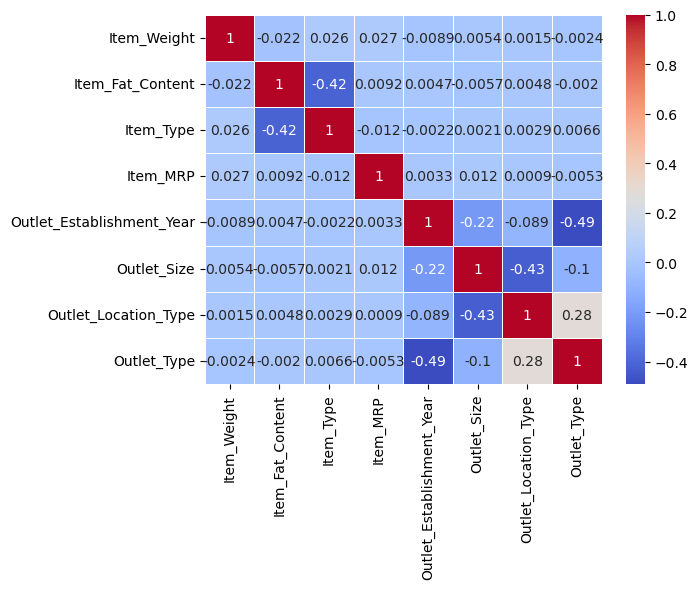

In [45]:
#Check for multicollinearity
sns.heatmap(X.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

The dependent features are not highly correlated so all featured are considered

In [46]:
#X=df.drop('Outlet_Establishment_Year',axis=1)

In [47]:
#Train-Test splitting with resampled data
from sklearn.model_selection import train_test_split

# X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Standarization

In [48]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [49]:
X_train_Scaled=pd.DataFrame(X_train_Scaled,columns=[X_train.columns])
X_test_Scaled=pd.DataFrame(X_test_Scaled,columns=[X_test.columns])

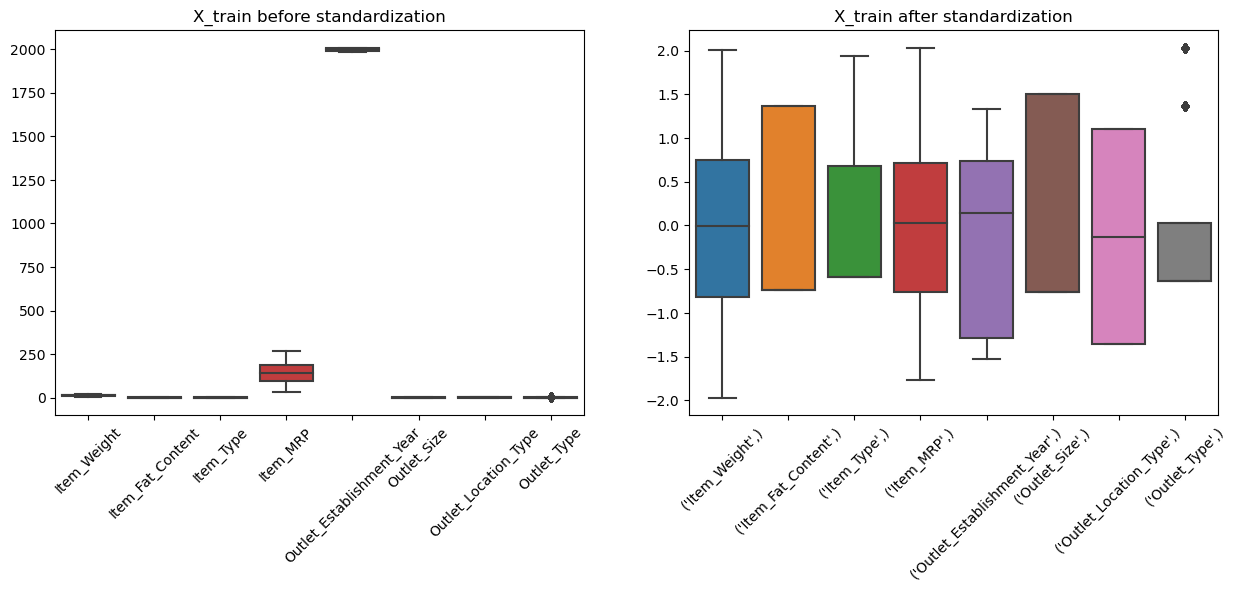

In [50]:
#Box Plots to understand the effect of standarization

# Create a figure with subplots and set the figure size
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# First subplot
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.xticks(rotation=45)
plt.title("X_train before standardization")

# Second subplot
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_Scaled)
plt.xticks(rotation=45)
plt.title("X_train after standardization")

# Display the plot
plt.show()


# Linear Regression Model

Mean Squared Error (MSE): 1494253.8637405396
Root Mean Squared Error (RMSE): 1222.3967701775637
Mean Absolute Error (MAE): 934.8390390200565
R_Square Error:  0.43003024329614326


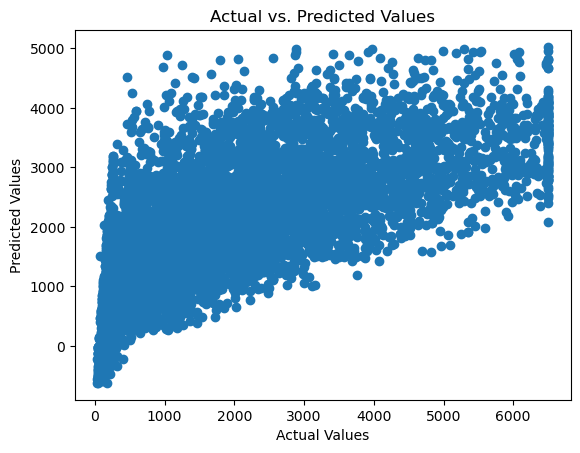

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score as R2 

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train_Scaled,y_train)

y_pred=linreg.predict(X_train_Scaled)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the Mean Absolute Error (MAE)
mae= mean_absolute_error(y_train, y_pred)

#Calculate the R_Square Error
R_sqr= R2(y_train, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R_Square Error: ",R_sqr)

#Scatter plot of actual vs. predicted values 
plt.scatter(y_train,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")


# Display the legend
plt.show()

# Lasso Regression

Mean Squared Error (MSE): 1526798.5820240634
Root Mean Squared Error (RMSE): 1235.636913508197
R_Square Error:  0.4320071479262855


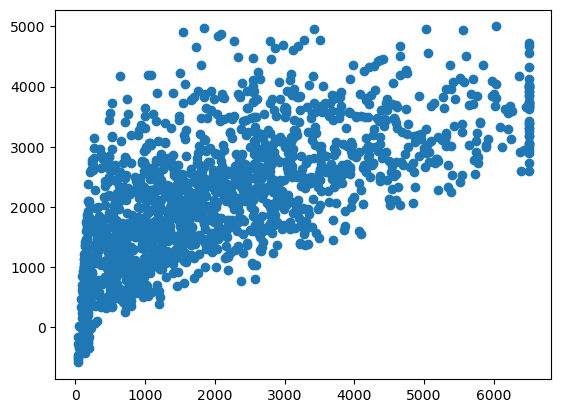

In [52]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_Scaled,y_train)

y_pred=lasso.predict(X_test_Scaled)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

#Calculate the R_Square Error
R_sqr= R2(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae= mean_absolute_error(y_train, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R_Square Error: ",R_sqr)
print("Mean Absolute Error (MAE):", mae)

plt.scatter(y_test,y_pred)

# Lasso Cross Validation

Mean Squared Error (MSE): 1526742.692944015
Root Mean Squared Error (RMSE): 1235.6142978065668
R_Square Error:  0.432027939534524


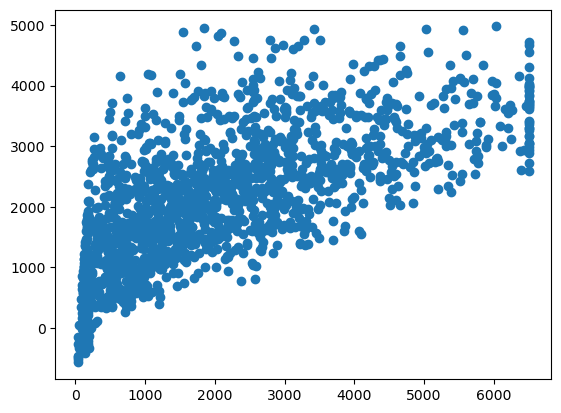

In [53]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_Scaled,y_train)

y_pred=lassocv.predict(X_test_Scaled)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

#Calculate the R_Square Error
R_sqr= R2(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae= mean_absolute_error(y_train, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R_Square Error: ",R_sqr)
print("Mean Absolute Error (MAE):", mae)

plt.scatter(y_test,y_pred)

# KNN

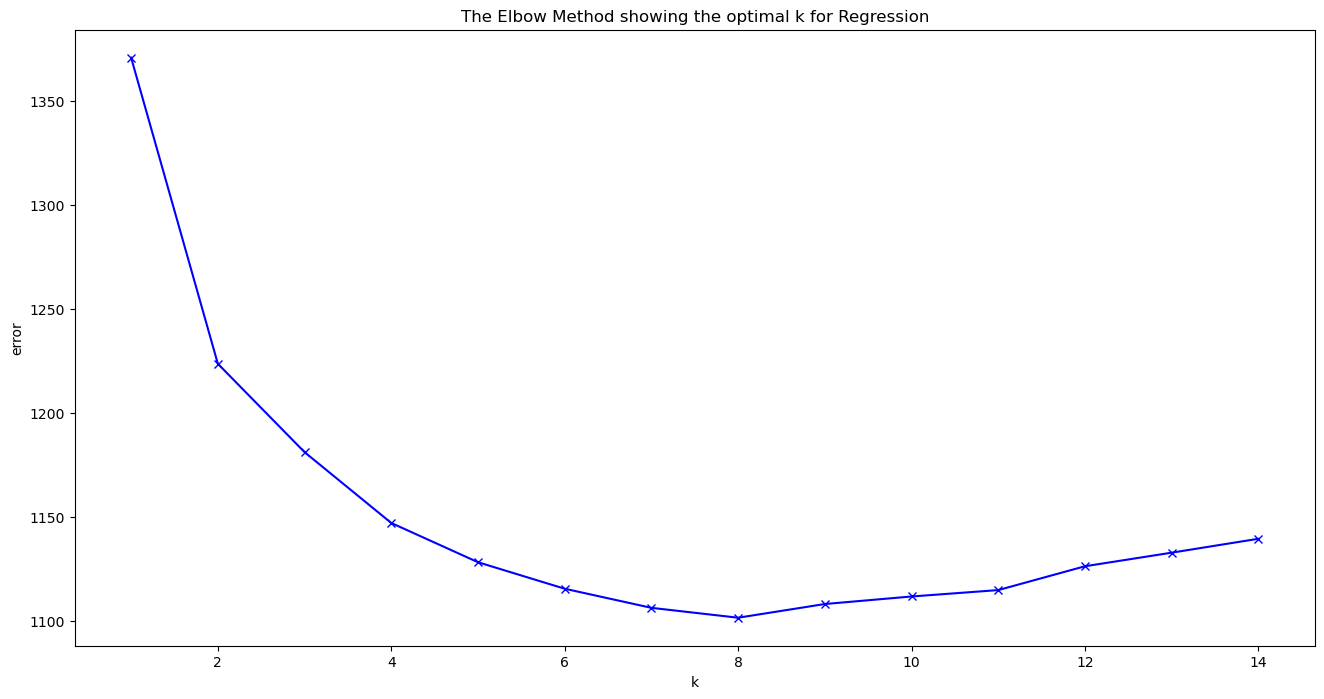

In [56]:
#Optimized value of k
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

error = []

for i in range(1, 15):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_KNN = knn.predict(X_test)
    error.append(np.sqrt(mean_squared_error(y_test, y_pred_KNN)))

plt.figure(figsize=(16, 8))
plt.plot(range(1, 15), error, 'bx-')
plt.xlabel('k')
plt.ylabel('error')
plt.title('The Elbow Method showing the optimal k for Regression')
plt.show()


In [59]:
from sklearn.neighbors import KNeighborsRegressor


import numpy as np

# Create the KNN Regressor
k = 8  # You can adjust the number of neighbors (k) as needed
knn = KNeighborsRegressor(n_neighbors=k)

# Train the regressor
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

#Calculate the R_Square Error
R_sqr= R2(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae= mean_absolute_error(y_train, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R_Square Error: ",R_sqr)
print("Mean Absolute Error (MAE):", mae)



Mean Squared Error (MSE): 1213609.8916949707
Root Mean Squared Error (RMSE): 1101.6396378557604
R_Square Error:  0.5485182185754519


# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeRegressor

# Create the Decision Tree Regressor
tree_reg = DecisionTreeRegressor()

# Train the regressor
tree_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_reg.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

#Calculate the R_Square Error
R_sqr= R2(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae= mean_absolute_error(y_train, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R_Square Error: ",R_sqr)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 2213997.2557362807
Root Mean Squared Error (RMSE): 1487.95068995457
R_Square Error:  0.17635853833324588


In [62]:
#Optimizing the depth
from sklearn.model_selection import GridSearchCV

# Define a range of depths to search over
depths = [3, 5, 7, 10]  # can be adjusted

# Create a DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

# Define a parameter grid to search over
param_grid = {'max_depth': depths}

# Create a GridSearchCV object to find the best depth
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Train the model with cross-validation
grid_search.fit(X_train, y_train)

# Get the best depth from the grid search
best_depth = grid_search.best_params_['max_depth']

# Create a Decision Tree Regressor with the best depth
best_tree_reg = DecisionTreeRegressor(max_depth=best_depth)

# Train the optimized regressor
best_tree_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_tree_reg.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R-Square Error
R_sqr = R2(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae= mean_absolute_error(y_train, y_pred)

print("Best Depth:", best_depth)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-Square Error:", R_sqr)
print("Mean Absolute Error (MAE):", mae)


Best Depth: 5
Mean Squared Error (MSE): 1086170.2687945394
Root Mean Squared Error (RMSE): 1042.194928405689
R-Square Error: 0.595927743139232


'''When the establishment year is being dropped then bias varience error are low(Very good model), but when consider both are high so underfitted???''' 